# <center>Proyecto 1</center>

#### ***Nombre***: Jose Eduardo Calderon Lopez
#### ***Carnet***: 14001764

<br>
<hr>
<br>

# 1. Imports necesarios para el proyecto

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression

# 2. Load inicial de datos

In [223]:
# Complete set
dataset = np.load('proyecto_training_data.npy')

In [225]:
filas = len(dataset)

# Training set
trainingData = dataset[:int(filas*0.8)]

# Validation set
validationData = dataset[int(filas*0.8):]

In [226]:
# Columnas de data set
saleprice = trainingData[:,0]
overallquality = trainingData[:,1]
firstfloorsqft = trainingData[:,2]
totalrooms = trainingData[:,3]
yearbuilt = trainingData[:,4]
lotfrontage = trainingData[:,5]

columnas = [saleprice, overallquality, firstfloorsqft, totalrooms, yearbuilt, lotfrontage]

# Labels de columnas de data set
colLabels = ("Sale Price","Overall Quality","First Floor sq ft","Total Rooms","Year built","Lot Frontage");

# 3. Análisis exploratorio

In [277]:
cols = 6

arrMeans = np.zeros(cols)
arrMaxValues = np.zeros(cols)
arrMinValues = np.zeros(cols)
arrStdDevs = np.zeros(cols)
arrRanges = np.zeros(cols)

for i in range(0,cols):
    arrMeans[i] = round(np.nanmean(trainingData[:,i]), 5)
    arrMaxValues[i] = round(np.nanmax(trainingData[:,i]), 5)
    arrMinValues[i] = round(np.nanmin(trainingData[:,i]), 5)
    arrStdDevs[i] = round(np.nanstd(trainingData[:,i]), 5)
arrRanges = list(map(lambda value1, value2: value1-value2, arrMaxValues, arrMinValues))

In [270]:
def printAnalysis(index):
    print(f"Media: {arrMeans[index]}")
    print(f"Valor máximo: {arrMaxValues[index]}")
    print(f"Valor mínimo: {arrMinValues[index]}")
    print(f"Rango: {arrRanges[index]}")
    print(f"Desviación estándar: {arrStdDevs[index]}")

### Sale Price ($)

In [271]:
printAnalysis(0)

Media: 180590.2774
Valor máximo: 755000.0
Valor mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95108


### Overall Quality

In [272]:
printAnalysis(1)

Media: 6.10103
Valor máximo: 10.0
Valor mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.37744


### First Floor sq ft

In [273]:
printAnalysis(2)

Media: 1156.32363
Valor máximo: 3228.0
Valor mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62033


### Total Rooms

In [274]:
printAnalysis(3)

Media: 6.48545
Valor máximo: 14.0
Valor mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.60845


### Construction date

In [275]:
printAnalysis(4)

Media: 1971.4512
Valor máximo: 2010.0
Valor mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.93888


### Lot Frontage

In [276]:
printAnalysis(5)

Media: 69.94699
Valor máximo: 313.0
Valor mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.46595


# 4. Histogramas de variables

In [110]:
def drawHistogram(column, title, xlabel, ylabel, color):
    sb.set(style="darkgrid")
    sb.histplot(trainingData[:,column], color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Sale Price

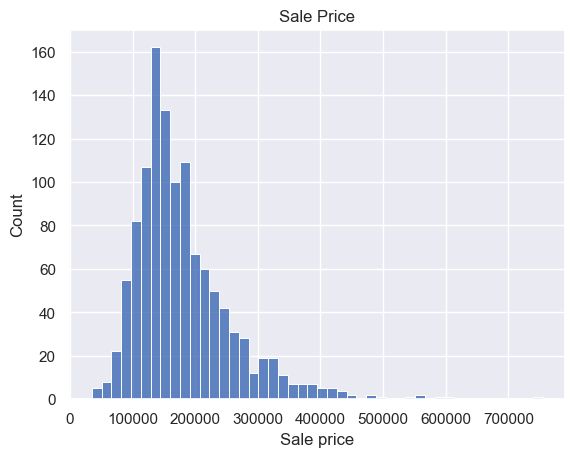

In [111]:
drawHistogram(0, "Sale Price", "SalePrice", "Count", "#3160b0")

### Overall Quality

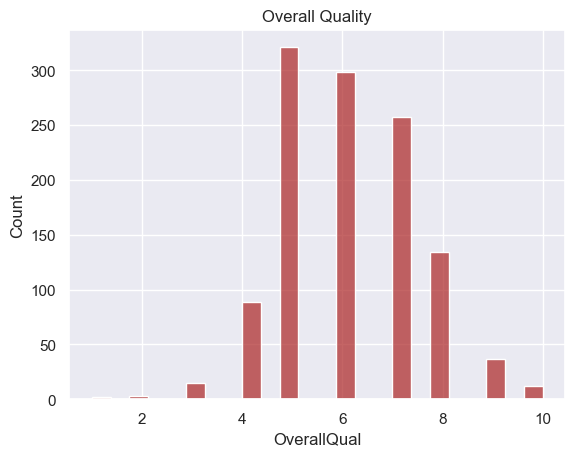

In [114]:
drawHistogram(1, "Overall Quality", "OverallQual", "Count", "#b03131")

### First Floor sq ft

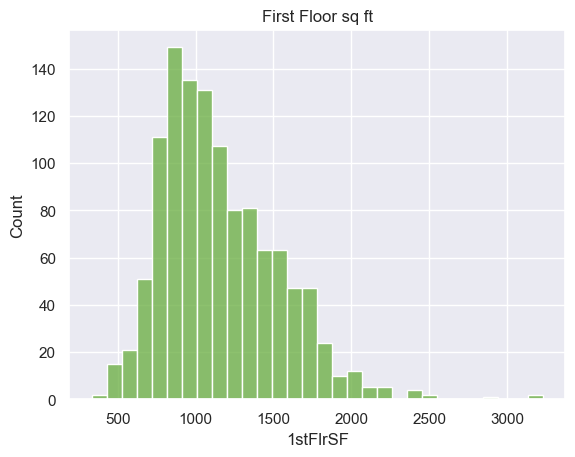

In [115]:
drawHistogram(2, "First Floor sq ft", "1stFlrSF", "Count", "#67ad3e")

### Total Rooms

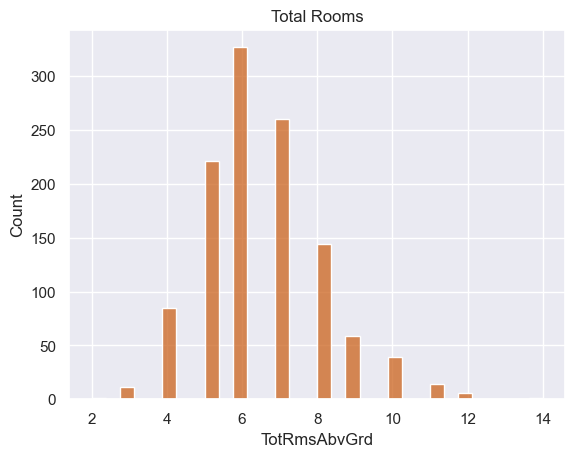

In [123]:
drawHistogram(3, "Total Rooms", "TotRmsAbvGrd", "Count", "#cc631d")

### Construction date

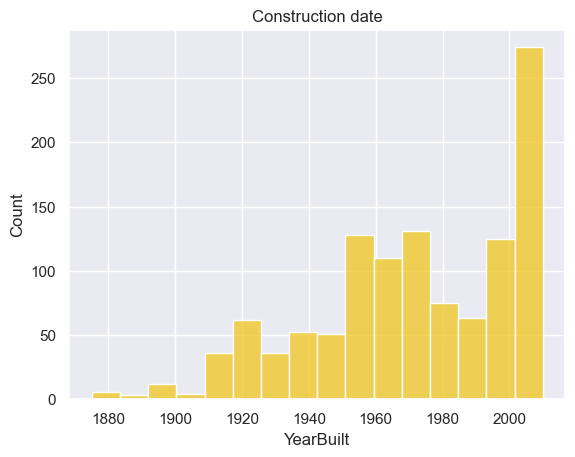

In [125]:
drawHistogram(4, "Construction date", "YearBuilt", "Count", "#f2c51f")

### Lot Frontage

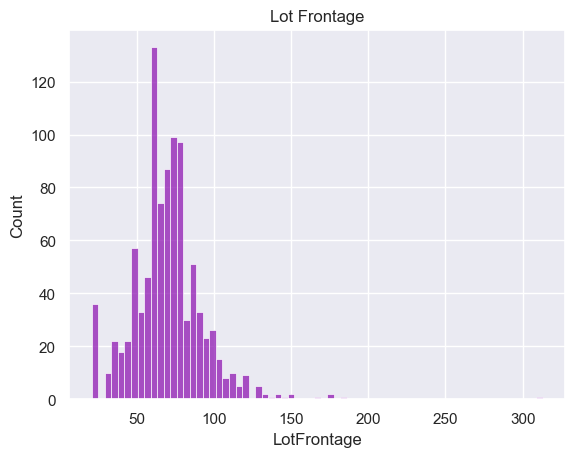

In [124]:
drawHistogram(5, "Lot Frontage", "LotFrontage", "Count", "#8f19b3")

# 5. Correlaciones

In [268]:
# Funcion que calcula el coeficiente de correlacion x vs y
def coefCorr(x,y):
    # return np.corrcoef(x,y)[0][1]
    return np.ma.corrcoef(np.ma.masked_invalid(x),np.ma.masked_invalid(y))[0][1]


# Funcion que despliega los valores de x, y, r
def printxyr(labelx, labely, r):
    print(f"x = {labelx}")
    print(f"y = {labely}")
    print(f"r = {r}\n")
    
    
# Funcion que dibuja grafica scatterplot de x vs y
def printScatterPlot(x,y, labelx, labely, r):
    
    # Informacion
    plt.title(f"{labelx} vs {labely} (r={r})")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.scatter(x,y, alpha=0.5)
    
    # Asepcto
    plt.rcParams['grid.alpha'] = 0.75
    plt.rcParams['grid.color'] = "#cccccc"
    plt.grid(True)
    
    # Desplegar
    plt.show()
    print("\n")

    
def printCorrelations():
    
    # Calculo de coeficientes de correlacion
    coeficientes = np.zeros(6)
    columnaY = saleprice
    
    for i, columnaX in enumerate(columnas):
        coeficientes[i] = round(coefCorr(columnaX, columnaY), 5)    
    
    
    # Grafica de x vs y
    labely = colLabels[0] # sale price label
    for i,r in enumerate(coeficientes):
        if(i > 0):
            labelx = colLabels[i]
            printScatterPlot(columnas[i],columnaY,labelx,labely,r)
            # printxyr(labelx, labely, r)
    
    
    # Calcular variables con mayor correlacion (se obvia el 1)
    sortedCoeficientes = sorted(coeficientes)
    c1 = sortedCoeficientes[-2]
    c2 = sortedCoeficientes[-3]
    
    indexC1 = np.where(coeficientes == c1)[0][0]
    indexC2 = np.where(coeficientes == c2)[0][0]
    
    labelC1 = colLabels[indexC1]
    labelC2 = colLabels[indexC2]
    
    print("Variables con mayor correlación:")
    printxyr(colLabels[0], labelC1, c1)
    printxyr(colLabels[0], labelC2, c2)
    

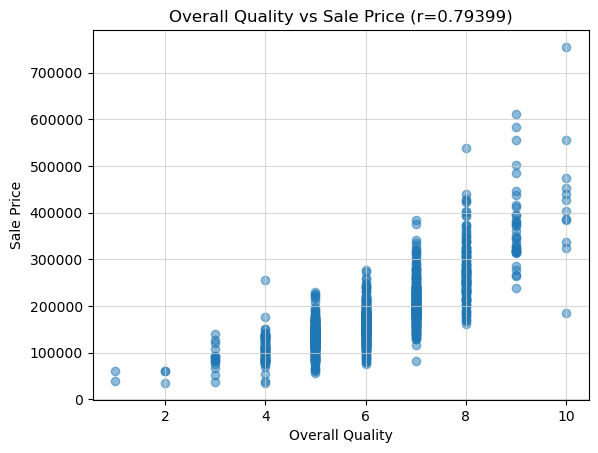

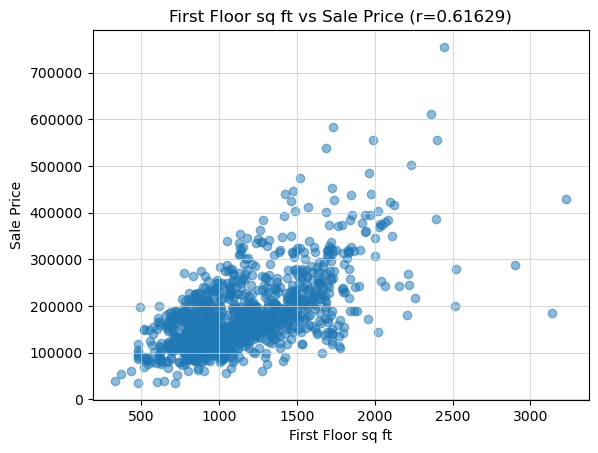

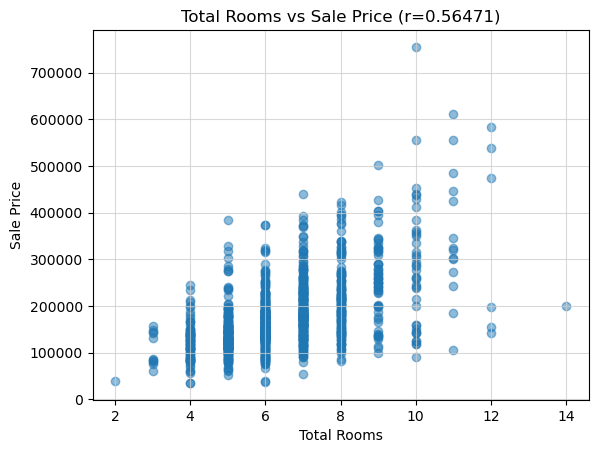

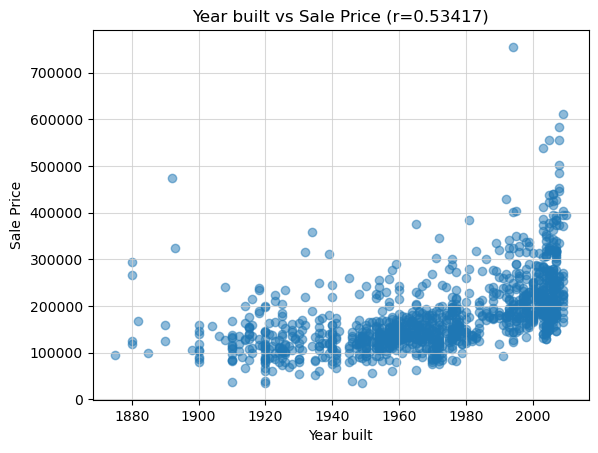

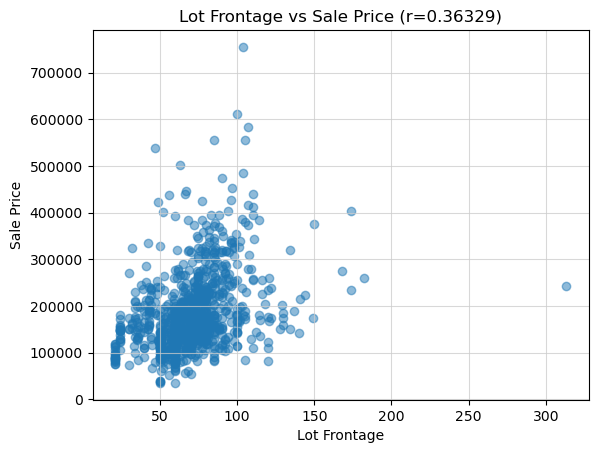



Variables con mayor correlación:
x = Sale Price
y = Overall Quality
r = 0.79399

x = Sale Price
y = First Floor sq ft
r = 0.61629



In [269]:
printCorrelations()

# 6 - 7. Modelo de Regresión Lineal

In [291]:
class ModeloRegresionLineal():

    def __init__(self):
        self.x = []
        self.y = []
        self.xlabel = "x"
        self.ylabel = "y"
        self.errores = []
        self.modelo = {}
        
    def entrenarModelo(self, vectorX, vectorY, epochs, imprimir_error_cada, alpha, xlabel="x", ylabel="y"):
        # Inicializacion de variables
        self.xlabel = xlabel
        self.ylabel = ylabel
        
        # Parametros iniciales
        parametros = np.zeros(2)
        
        # Matriz x,1
        x = np.array([vectorX, np.ones(len(vectorX))])
        x = np.transpose(x)
        
        # y (solo es para mejor organizacion y facilidad de lectura)
        y = vectorY
        self.x = x
        self.y = y
        
        # Iteracion por cada epoch
        for e in range(0,epochs):
            # prediccion y
            predY = np.dot(x, parametros)
            
            # calculo de error (y guardado)
            error = self._calcularError(y, predY)
            self.errores.append(error)
            
            # desplegar error cada cierta cantidad de iteraciones
            if((e+1)%imprimir_error_cada == 0):
                print(f"Interacion {e+1}: {error}")
            
            # calculo de gradientes
            gradientes = self._calcularGradientes(x, y, predY)
            
            # actualizar parametros
            parametros = self._calcularParametros(parametros, gradientes, alpha)
            self.modelo[e] = parametros
            
        return self.modelo, self.errores
    
    # Funcion para calcular el error
    def _calcularError(self, y, predY):
        n = len(y)
        return sum((y-predY)**2)/(2*n)
    
    # Funcion para calcular gradientes
    def _calcularGradientes(self, x, y, predY):
        n = len(y)
        return np.dot((predY-y),x)/n
    
    # Funcion para caluclar parametros
    def _calcularParametros(self, parametros, gradientes, alpha):
        return parametros-(alpha*gradientes)
    
    # Plot de error en el tiempo
    def plotCurvaAprendizaje(self):
        plt.title("Curva de aprendizaje")
        plt.xlabel("Iteracion")
        plt.ylabel("Error")
        plt.plot(range(0,len(self.errores)), self.errores)
        plt.show()
        
    # Plot de evoluion de modelo
    def plotModelo(self, n):
        parametros = np.array([value for value in self.modelo.values()])
        
        newY = []
        newX = [fila[0] for fila in self.x]
        for i in range(0,len(parametros)):
            if(i%n == 0):
                newY = np.dot(self.x, parametros[i])
                plt.plot(newX, newY, label=f"Iteración {i}")
        
        plt.title("Evolución de modelo")
        plt.scatter(newX,newY, label="Resultado")
        plt.scatter(newX,self.y, label="Original", alpha=0.5)
        
        # Asepcto
        plt.rcParams['grid.alpha'] = 0.75
        plt.rcParams['grid.color'] = "#cccccc"
        plt.grid(True)
    
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.show()    


## 7.1 Entrenar modelos seleccionados

### Overall Quality vs Sale Price

Interacion 500: 13470389172.414846
Interacion 1000: 9482625755.901102
Interacion 1500: 6811661542.875065
Interacion 2000: 5022663568.803623
Interacion 2500: 3824389262.0486693
Interacion 3000: 3021770073.410529
Interacion 3500: 2484152923.3148627
Interacion 4000: 2124028947.4528415
Interacion 4500: 1882786428.7648199
Interacion 5000: 1721168391.3539374
Interacion 5500: 1612881284.4756432
Interacion 6000: 1540314204.7153325
Interacion 6500: 1491671715.1552067
Interacion 7000: 1459053464.0156443


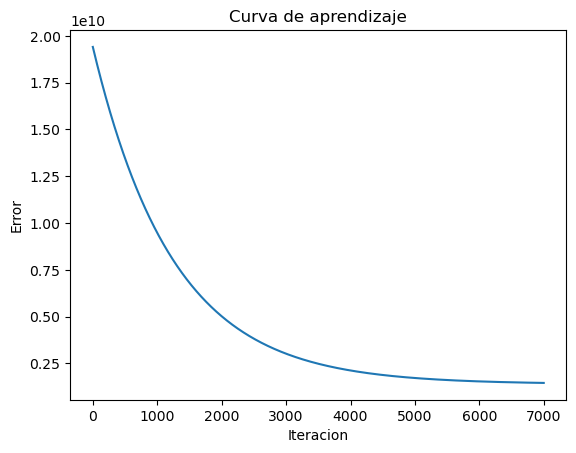

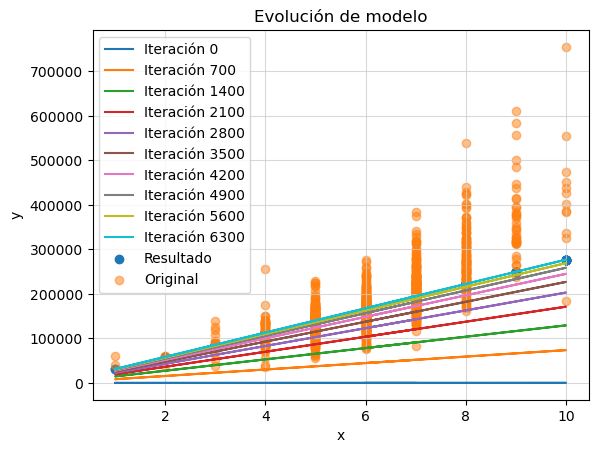

In [292]:
e = 7000
error = 500
alpha = 0.00001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(overallquality, saleprice,e,error,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(700)

### First Floor sq ft vs Sale Price

Interacion 1000: 14953132604.304989
Interacion 2000: 11632411619.211845
Interacion 3000: 9160913144.350922
Interacion 4000: 7321461790.612161
Interacion 5000: 5952421381.59691
Interacion 6000: 4933491667.687395
Interacion 7000: 4175137308.586982
Interacion 8000: 3610720228.418845
Interacion 9000: 3190643998.0875034
Interacion 10000: 2877995700.3655686
Interacion 11000: 2645302319.8953466
Interacion 12000: 2472116635.7704215
Interacion 13000: 2343220484.372778
Interacion 14000: 2247287509.6677184
Interacion 15000: 2175887894.218403
Interacion 16000: 2122747614.6936846
Interacion 17000: 2083197131.2067256
Interacion 18000: 2053761065.7419221
Interacion 19000: 2031852813.9133477
Interacion 20000: 2015547254.9948266


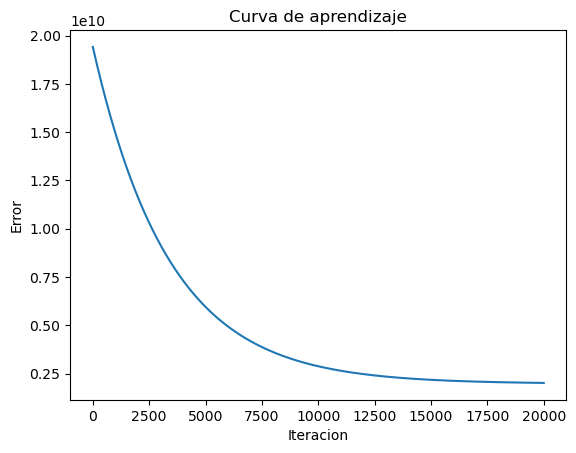

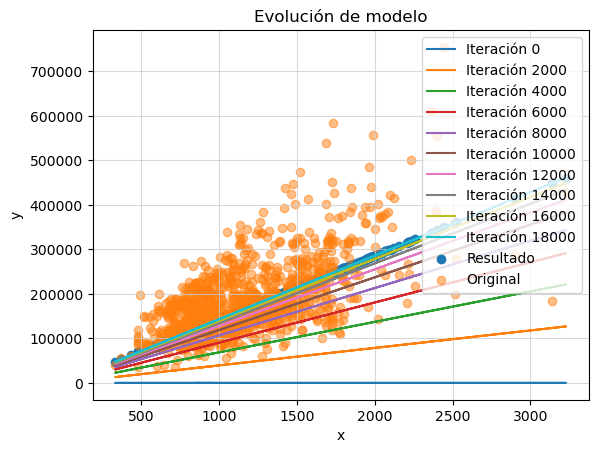

In [293]:
epochs = 20000
print_error_cada = 1000
alpha = 0.0000000001

modelo1 = ModeloRegresionLineal()
parametros, errores = modelo1.entrenarModelo(firstfloorsqft,saleprice,epochs,print_error_cada,alpha)
modelo1.plotCurvaAprendizaje()
modelo1.plotModelo(2000)

## 7.2 Entrenar modelos con scikit-learn

### Overall Quality vs Sale Price

In [295]:
overallquality1 = np.array(overallquality).reshape(-1,1)

# Overall Quality vs Sale price
modeloSL1 = LinearRegression()
modeloSL1.fit(overallquality1, saleprice)

LinearRegression()

### First Floor sq ft vs Sale Price

In [294]:
firstfloorsqft1 = np.array(firstfloorsqft).reshape(-1,1)

# First Floor sq ft vs Sale price
modeloSL2 = LinearRegression()
modeloSL2.fit(firstfloorsqft1, saleprice)

LinearRegression()

## 7.3 Predicción Estimada

In [ ]:
# saleprice = trainingData[:,0]
# overallquality = trainingData[:,1]
# firstfloorsqft = trainingData[:,2]
# totalrooms = trainingData[:,3]
# yearbuilt = trainingData[:,4]
# lotfrontage = trainingData[:,5]

In [ ]:
def prediccionEstimada(modeloManual, modeloSKL, x):
    print("pred estimada")